In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import FukudaCsv


# アラームログが格納されているディレクトリを指定する. 空文字を指定した場合はサンプルデータを表示します．
dir_path_to_process = ''

# CSVのロード
df = FukudaCsv.load(dir_path_to_process)

# 画像サイズを指定
figsize_ = 18, 8

記録時刻:2021-10-12 07:38:00 〜 2021-10-14 17:06:00,  2 days 09:28:00 (57時間)


In [2]:
df.head()

,Unnamed:0,No.,時刻,床番号,コード,発生要因,値,継続時間,レベル,継続時間int,hour,dayhour,dayhour10min,alarm_level,alarm_type,start_datetime,diff_datetime,diff_sec,diff_min
0,44933,1798,2021-10-12 07:38:00,CH1001,0x201F,心電図ノイズ混入,---,4,N(TECH_),4,07,10月12日07時,12日07時30分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:00:00,0.0,0
1,44932,1799,2021-10-12 07:38:00,CH1001,0x201F,心電図ノイズ混入,---,5,N(TECH_),5,07,10月12日07時,12日07時30分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:00:00,0.0,0
2,44931,1800,2021-10-12 07:49:00,CH1001,0x201F,心電図ノイズ混入,---,3,N(TECH_),3,07,10月12日07時,12日07時40分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:11:00,660.0,11
3,4956,2983,2021-10-12 08:09:00,CH1002,0x1010,ＳｐＯ2下限,(計測値)89 < (下限閾値)90,25,H(MEAS_),25,08,10月12日08時,12日08時00分台,H,(MEAS_),2021-10-12 07:38:00,0 days 00:31:00,1860.0,31
4,44906,1825,2021-10-12 08:11:00,CH1001,0x201F,心電図ノイズ混入,---,8,N(TECH_),8,08,10月12日08時,12日08時10分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:33:00,1980.0,33


In [3]:
# コードと発生要因の一覧を得る. 解析に不要な情報があれば削除する際に必要になる．
# df.groupby(['コード', '発生要因'])[['発生要因']].count()

Text(0.5, 1.0, 'CH別アラーム継続時間の平均値')

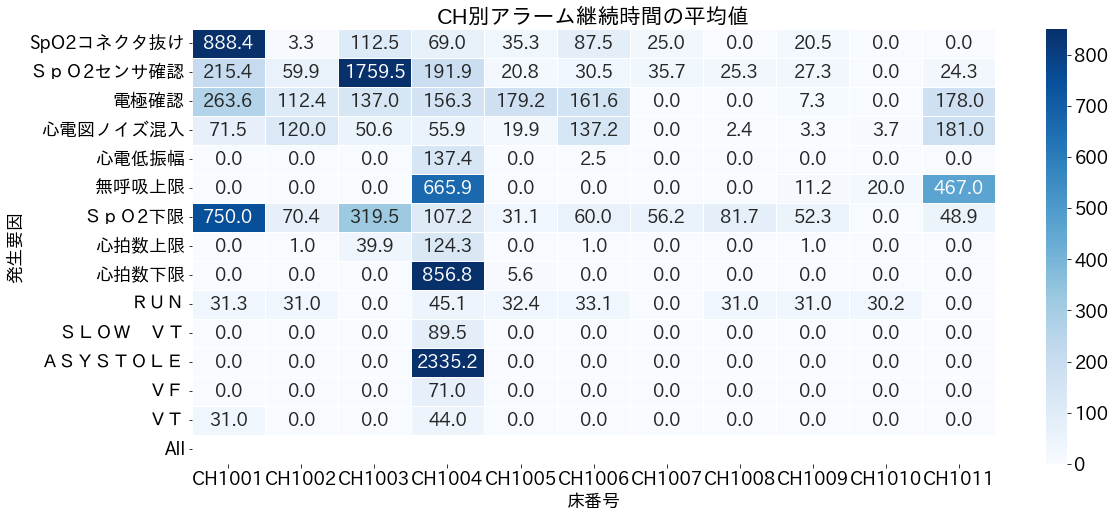

In [4]:

pt = pd.pivot_table(df, index=['発生要因'], columns='床番号', values='継続時間int', aggfunc=np.mean, fill_value=0)

pt = pt.reindex(index=['SpO2コネクタ抜け', 'ＳｐＯ2センサ確認', '電極確認', '心電図ノイズ混入', '心電低振幅', 
                     '無呼吸上限', 'ＳｐＯ2下限', '心拍数上限', '心拍数下限', 'ＲＵＮ', 'ＳＬＯＷ　ＶＴ', 'ＡＳＹＳＴＯＬＥ', 'ＶＦ', 'ＶＴ', 'All'])

plt.figure(figsize=figsize_)

sns.heatmap(pt,annot=True, linewidths=.5, fmt="1.1f", cmap="Blues", robust=True)

plt.title('CH別アラーム継続時間の平均値')

Text(0.5, 1.0, 'CH別アラーム継続時間の中央値')

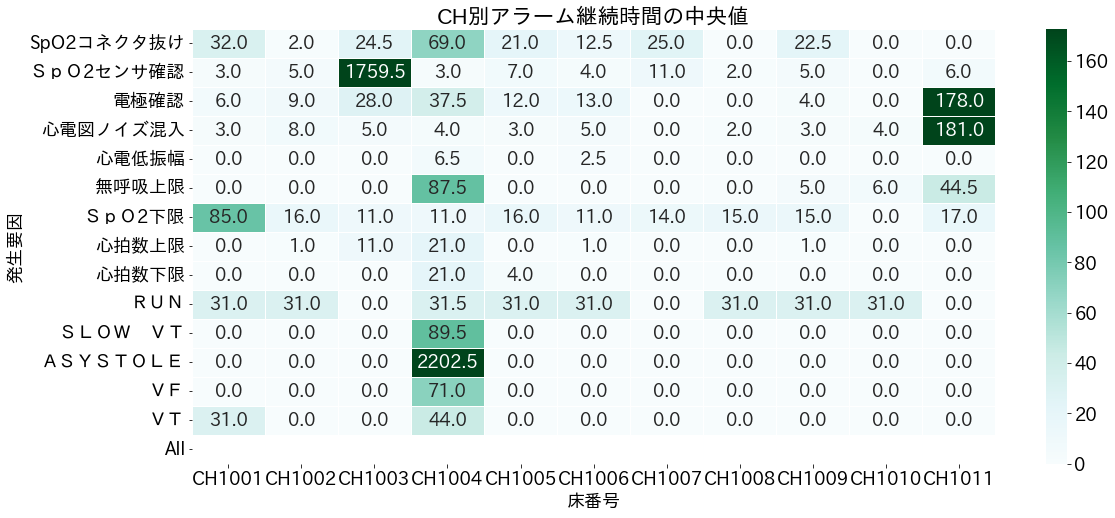

In [5]:
pt = pd.pivot_table(df, index=['発生要因'], columns='床番号', values='継続時間int', aggfunc=np.median, fill_value=0)

pt = pt.reindex(index=['SpO2コネクタ抜け', 'ＳｐＯ2センサ確認', '電極確認', '心電図ノイズ混入', '心電低振幅', 
                     '無呼吸上限', 'ＳｐＯ2下限', '心拍数上限', '心拍数下限', 'ＲＵＮ', 'ＳＬＯＷ　ＶＴ', 'ＡＳＹＳＴＯＬＥ', 'ＶＦ', 'ＶＴ', 'All'])

plt.figure(figsize=figsize_)

sns.heatmap(pt,annot=True, linewidths=.5, fmt="1.1f", cmap="BuGn", robust=True)
plt.title('CH別アラーム継続時間の中央値')